In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Extra Libs
import matplotlib.dates as mdates
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.models import HoverTool
from IPython.display import HTML, display

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import IsolationForest


In [56]:
df = pd.read_csv(r'C:\Users\pagar\OneDrive\Desktop\prof kitchin\kaggle\nyc_taxi.csv', parse_dates=['timestamp'])

(df.head(5)
 .style
 .set_caption('New York City Taxi Demand')
 .format({'value':"{:,.0f}"})
)

,timestamp,value
0,2014-07-01 00:00:00,"10,844"
1,2014-07-01 00:30:00,"8,127"
2,2014-07-01 01:00:00,"6,210"
3,2014-07-01 01:30:00,"4,656"
4,2014-07-01 02:00:00,"3,820"


In [57]:
len(df)

10320

### Feature Engineering
checking for blank values; checking the datatypes

In [51]:
def overview(df: pd.DataFrame, timestamp_col: str = None) -> None:
    print('Null Count:\n', df.isnull().sum(),'\n')
    print('Data Types:\n', df.dtypes)
    
    if timestamp_col is not None:
        print('\nDate Range:\n\nStart:\t',df[timestamp_col].min())
        print('End:\t',df[timestamp_col].max())
        print('Days:\t',(df[timestamp_col].max() - df[timestamp_col].min()))

In [53]:
overview(df, timestamp_col='timestamp')

Null Count: timestamp    0
value        0
dtype: int64 

Data Types: timestamp    datetime64[ns]
value                 int64
dtype: object

Date Range:

Start:	 2014-07-01 00:00:00
End:	 2015-01-31 23:30:00
Days:	 214 days 23:30:00


#### There are no null values and the datatypes for each column is printed. Started at 1 July 2014 and ended at 31st January 2015
So the total number of days are: 214 days

### Visualization

In [7]:
!pip install holoviews

  Obtaining dependency information for holoviews from https://files.pythonhosted.org/packages/56/89/8df4efa78df8b129847c8a7c0e492376cca62ab68453e5a20375a1c6291b/holoviews-1.20.0-py3-none-any.whl.metadata
  Obtaining dependency information for bokeh>=3.1 from https://files.pythonhosted.org/packages/56/12/2c266a0dc57379c60b4e73a2f93e71343db4170bf26c5a76a74e7d8bce2a/bokeh-3.6.2-py3-none-any.whl.metadata
  Obtaining dependency information for colorcet from https://files.pythonhosted.org/packages/c6/c6/9963d588cc3d75d766c819e0377a168ef83cf3316a92769971527a1ad1de/colorcet-3.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for panel>=1.0 from https://files.pythonhosted.org/packages/a8/f3/4cb65d4ce71dc7527186438672e1c78d18bfebd510e650cc863931de3b5b/panel-1.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for param<3.0,>=2.0 from https://files.pythonhosted.org/packages/99/56/370a6636e072a037b52499edd8928942df7f887974fc54444ece5152d26a/param-2.2.0-py3-none-any.whl


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
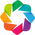

C:\Users\pagar\AppData\Local\Temp\ipykernel_29216\504548951.py:13: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  Weekly = hv.Curve(df.set_index('timestamp').resample('w').mean()).opts(


In [58]:
import holoviews as hv

hv.extension('bokeh')  # Enable Bokeh extension

Hourly = hv.Curve(df.set_index('timestamp').resample('h').mean()).opts(
    hv.opts.Curve(title="New York City Taxi Demand Hourly", xlabel="Date", ylabel="Demand",
               width=700, height=300, tools=['hover'], show_grid=True))

Daily = hv.Curve(df.set_index('timestamp').resample('d').mean()).opts(
    hv.opts.Curve(title="New York City Taxi Demand Daily", xlabel="Date", ylabel="Demand",
               width=700, height=300, tools=['hover'], show_grid=True))

Weekly = hv.Curve(df.set_index('timestamp').resample('w').mean()).opts(
    hv.opts.Curve(title="New York City Taxi Demand Weekly", xlabel="Date", ylabel="Demand",
               width=700, height=300, tools=['hover'], show_grid=True))

In [59]:

(Hourly + Daily + Weekly).opts(shared_axes=False).cols(1)

:Layout
   .Curve.I   :Curve   [timestamp]   (value)
   .Curve.II  :Curve   [timestamp]   (value)
   .Curve.III :Curve   [timestamp]   (value)

In [15]:
# A variety of resamples which I may or may not use
df_hourly = df.set_index('timestamp').resample('h').mean().reset_index()
df_daily = df.set_index('timestamp').resample('d').mean().reset_index()
df_weekly = df.set_index('timestamp').resample('w').mean().reset_index()

C:\Users\pagar\AppData\Local\Temp\ipykernel_29216\335819791.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.set_index('timestamp').resample('H').mean().reset_index()


In [16]:
for DataFrame in [df_hourly, df_daily]:
    DataFrame['Weekday'] = (pd.Categorical(DataFrame['timestamp'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )
    DataFrame['Hour'] = DataFrame['timestamp'].dt.hour
    DataFrame['Day'] = DataFrame['timestamp'].dt.weekday
    DataFrame['Month'] = DataFrame['timestamp'].dt.month
    DataFrame['Year'] = DataFrame['timestamp'].dt.year
    DataFrame['Month_day'] = DataFrame['timestamp'].dt.day
    DataFrame['Lag'] = DataFrame['value'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['value'].rolling(7, min_periods=1).mean()
    DataFrame = DataFrame.dropna()

In [60]:
(hv.Distribution(df['value'])
.opts(hv.opts.Distribution(title="Overall Value Distribution",
                        xlabel="Value",
                        ylabel="Density",
                        width=700, height=300,
                        tools=['hover'],show_grid=True)
     ))
# We are trying to detect anomales in Taxi Demand. This is the 'value' column

:Distribution   [value]   (Density)

In [21]:
# We can also see how this varies by day. The legend acts as a filter here, so one can select/deselect certain days.

by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack()
plot = hv.Distribution(by_weekday['Monday'], label='Monday') * hv.Distribution(by_weekday['Tuesday'], label='Tuesday') * hv.Distribution(by_weekday['Wednesday'], label='Wednesday') * hv.Distribution(by_weekday['Thursday'], label='Thursday') * hv.Distribution(by_weekday['Friday'], label='Friday') * hv.Distribution(by_weekday['Saturday'], label='Saturday') *hv.Distribution(by_weekday['Sunday'], label='Sunday').opts(hv.opts.Distribution(title="Demand Density by Day & Hour"))
plot.opts(hv.opts.Distribution(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand", xlabel="Demand"))

C:\Users\pagar\AppData\Local\Temp\ipykernel_29216\558163290.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack()


:Overlay
   .Distribution.Monday    :Distribution   [Monday]   (Density)
   .Distribution.Tuesday   :Distribution   [Tuesday]   (Density)
   .Distribution.Wednesday :Distribution   [Wednesday]   (Density)
   .Distribution.Thursday  :Distribution   [Thursday]   (Density)
   .Distribution.Friday    :Distribution   [Friday]   (Density)
   .Distribution.Saturday  :Distribution   [Saturday]   (Density)
   .Distribution.Sunday    :Distribution   [Sunday]   (Density)

In [23]:
hv.Bars(df_hourly[['value','Weekday']].groupby('Weekday').mean()).opts(
    hv.opts.Bars(title="New York City Taxi Demand by Day", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

C:\Users\pagar\AppData\Local\Temp\ipykernel_29216\2450699308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hv.Bars(df_hourly[['value','Weekday']].groupby('Weekday').mean()).opts(


:Bars   [Weekday]   (value)

In [24]:
# Through the plots above we learn a few interesting things. Let's now turn to average hourly demand.

hv.Curve(df_hourly[['value','Hour']].groupby('Hour').mean()).opts(
    hv.opts.Curve(title="New York City Taxi Demand Hourly", xlabel="Hour", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

:Curve   [Hour]   (value)

In [26]:
by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack()
plot = hv.Curve(by_weekday['Monday'], label='Monday') * hv.Curve(by_weekday['Tuesday'], label='Tuesday') * hv.Curve(by_weekday['Wednesday'], label='Wednesday') * hv.Curve(by_weekday['Thursday'], label='Thursday') * hv.Curve(by_weekday['Friday'], label='Friday') * hv.Curve(by_weekday['Saturday'], label='Saturday') *hv.Curve(by_weekday['Sunday'], label='Sunday').opts(hv.opts.Curve(title="Average Demand by Day & Hour"))
plot.opts(hv.opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand"))

# in Matplotlib/Pandas
# #df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack().plot()

C:\Users\pagar\AppData\Local\Temp\ipykernel_29216\456437417.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack()


:Overlay
   .Curve.Monday    :Curve   [Hour]   (Monday)
   .Curve.Tuesday   :Curve   [Hour]   (Tuesday)
   .Curve.Wednesday :Curve   [Hour]   (Wednesday)
   .Curve.Thursday  :Curve   [Hour]   (Thursday)
   .Curve.Friday    :Curve   [Hour]   (Friday)
   .Curve.Saturday  :Curve   [Hour]   (Saturday)
   .Curve.Sunday    :Curve   [Hour]   (Sunday)

In [27]:
df_hourly = (df_hourly
             .join(df_hourly.groupby(['Hour','Weekday'])['value'].mean(),
                   on = ['Hour', 'Weekday'], rsuffix='_Average')
            )

df_daily = (df_daily
            .join(df_daily.groupby(['Hour','Weekday'])['value'].mean(),
                  on = ['Hour', 'Weekday'], rsuffix='_Average')
           )

df_hourly.tail()

C:\Users\pagar\AppData\Local\Temp\ipykernel_29216\3887481213.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .join(df_hourly.groupby(['Hour','Weekday'])['value'].mean(),
C:\Users\pagar\AppData\Local\Temp\ipykernel_29216\3887481213.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .join(df_daily.groupby(['Hour','Weekday'])['value'].mean(),


,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average
5155,2015-01-31 19:00:00,28288.5,Saturday,19,5,1,2015,31,26665.0,23537.214286,24501.870968
5156,2015-01-31 20:00:00,24138.0,Saturday,20,5,1,2015,31,28288.5,23673.571429,22193.758065
5157,2015-01-31 21:00:00,24194.5,Saturday,21,5,1,2015,31,24138.0,24031.214286,21983.241935
5158,2015-01-31 22:00:00,26515.0,Saturday,22,5,1,2015,31,24194.5,24635.714286,23949.951613
5159,2015-01-31 23:00:00,26439.5,Saturday,23,5,1,2015,31,26515.0,25485.071429,25192.516129


In [28]:
sat_max = (df_hourly
           .query("Day == 5")
           .set_index('timestamp')
           .loc['2015-01-31':'2015-01-31']
           .reset_index()['value']
          )


avg_sat = (df_hourly
           .groupby(['Weekday','Hour'])['value']
           .mean()
           .unstack()
           .T['Saturday']
          )

avg_max_comparison = hv.Curve(avg_sat, label='Average Saturday') * hv.Curve(sat_max, label='Busiest Saturday').opts(hv.opts.Curve(title="Average Saturday vs Busiest Saturday"))
avg_max_comparison.opts(hv.opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand", show_legend=False))

C:\Users\pagar\AppData\Local\Temp\ipykernel_29216\1704750743.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Weekday','Hour'])['value']


:Overlay
   .Curve.Average_Saturday :Curve   [Hour]   (Saturday)
   .Curve.Busiest_Saturday :Curve   [index]   (value)

### Models: Isolation Forest

In [29]:
#Clear nulls
df_hourly.dropna(inplace=True)

# Daily
df_daily_model_data = df_daily[['value', 'Hour', 'Day',  'Month','Month_day','Rolling_Mean']].dropna()

# Hourly
model_data = df_hourly[['value', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'timestamp']].set_index('timestamp').dropna()
model_data.head()

,value,Hour,Day,Month_day,Month,Rolling_Mean,Lag
timestamp,,,,,,,
2014-07-01 01:00:00,5433.0,1,1,1,7,7459.250000,9485.5
2014-07-01 02:00:00,3346.5,2,1,1,7,6088.333333,5433.0
2014-07-01 03:00:00,2216.5,3,1,1,7,5120.375000,3346.5
2014-07-01 04:00:00,2189.5,4,1,1,7,4534.200000,2216.5
2014-07-01 05:00:00,3439.5,5,1,1,7,4351.750000,2189.5


In [68]:
from sklearn.ensemble import IsolationForest
def run_isolation_forest(model_data: pd.DataFrame, contamination=0.005, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    
    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators,
                          max_samples=max_samples)
         )
    
    IF.fit(model_data)
    
    output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    
    score = IF.decision_function(model_data)
    
    return output, score

In [65]:
outliers, score = run_isolation_forest(model_data)

In [66]:
df_hourly = (df_hourly
             .assign(Outliers = outliers)
             .assign(Score = score)
            )

df_hourly

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score
1,2014-07-01 01:00:00,5433.0,Tuesday,1,1,7,2014,1,9485.5,7459.250000,5028.193548,0.0,0.037801
2,2014-07-01 02:00:00,3346.5,Tuesday,2,1,7,2014,1,5433.0,6088.333333,3052.112903,0.0,0.056089
3,2014-07-01 03:00:00,2216.5,Tuesday,3,1,7,2014,1,3346.5,5120.375000,2039.580645,0.0,0.053583
4,2014-07-01 04:00:00,2189.5,Tuesday,4,1,7,2014,1,2216.5,4534.200000,2031.258065,0.0,0.061102
5,2014-07-01 05:00:00,3439.5,Tuesday,5,1,7,2014,1,2189.5,4351.750000,3207.338710,0.0,0.076468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,Saturday,19,5,1,2015,31,26665.0,23537.214286,24501.870968,0.0,0.001273
5156,2015-01-31 20:00:00,24138.0,Saturday,20,5,1,2015,31,28288.5,23673.571429,22193.758065,0.0,0.004279
5157,2015-01-31 21:00:00,24194.5,Saturday,21,5,1,2015,31,24138.0,24031.214286,21983.241935,0.0,0.046274
5158,2015-01-31 22:00:00,26515.0,Saturday,22,5,1,2015,31,24194.5,24635.714286,23949.951613,1.0,0.027190


In [67]:
IF = IsolationForest(random_state=0, contamination=0.005, n_estimators=200, max_samples=0.7)
IF.fit(model_data)

# New Outliers Column
df_hourly['Outliers'] = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)

# Get Anomaly Score
score = IF.decision_function(model_data)

# New Anomaly Score column
df_hourly['Score'] = score

df_hourly.head()

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score
1,2014-07-01 01:00:00,5433.0,Tuesday,1,1,7,2014,1,9485.5,7459.250000,5028.193548,0.0,0.037801
2,2014-07-01 02:00:00,3346.5,Tuesday,2,1,7,2014,1,5433.0,6088.333333,3052.112903,0.0,0.056089
3,2014-07-01 03:00:00,2216.5,Tuesday,3,1,7,2014,1,3346.5,5120.375000,2039.580645,0.0,0.053583
4,2014-07-01 04:00:00,2189.5,Tuesday,4,1,7,2014,1,2216.5,4534.200000,2031.258065,0.0,0.061102
5,2014-07-01 05:00:00,3439.5,Tuesday,5,1,7,2014,1,2189.5,4351.750000,3207.338710,0.0,0.076468


### Viewing the Anomalies

In [36]:
def outliers(thresh):
    print(f'Number of Outliers below Anomaly Score Threshold {thresh}:')
    print(len(df_hourly.query(f"Outliers == 1 & Score <= {thresh}")))

In [40]:
from bokeh.models import HoverTool
tooltips = [
    ('Weekday', '@Weekday'),
    ('Day', '@Month_day'),
    ('Month', '@Month'),
    ('Value', '@value'),
    ('Average Value', '@value_Average'),
    ('Outliers', '@Outliers')
]
hover = HoverTool(tooltips=tooltips)

hv.Points(df_hourly.query("Outliers == 1")).opts(size=10, color='#ff0000') * hv.Curve(df_hourly).opts(hv.opts.Curve(title="New York City Taxi Demand Anomalies", xlabel="", ylabel="Demand" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

:Overlay
   .Points.I :Points   [timestamp,value]   (Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score)
   .Curve.I  :Curve   [timestamp]   (value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score)

In [41]:
len(df_hourly.query("Outliers == 1"))

26

### Assessing Outliers

In [42]:
frequencies, edges = np.histogram(score, 50)
hv.Histogram((edges, frequencies)).opts(width=800, height=300,tools=['hover'], xlabel='Score')

:Histogram   [x]   (Frequency)

In [ ]:
# As I said above, we can now see the anomaly scores for our dataset. The lower, the more abnormal. Negative scores represent outliers, positive scores represent inliers.

# This offers us some flexibility in determining our cutoff points for anomalies.

In [43]:
# Function to view number of outliers at a given threshold
outliers(0.05)

#for num in (np.arange(-0.08, 0.2, 0.02)):
#    print(len(df_hourly.query(f"Outliers == 1 & Score <= {num}")))
#    num_outliers = len(df_hourly.query(f"Outliers == 1 & Score <= {num}"))

Number of Outliers below Anomaly Score Threshold 0.05:
25


In [44]:
hover = HoverTool(tooltips=tooltips)

hv.Points(df_hourly.query("Outliers == 1 & Score <= 0.05")).opts(size=10, color='#ff0000') * hv.Curve(df_hourly).opts(hv.opts.Curve(title="New York City Taxi Demand", xlabel="", ylabel="Demand" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

:Overlay
   .Points.I :Points   [timestamp,value]   (Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score)
   .Curve.I  :Curve   [timestamp]   (value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,Outliers,Score)

In [46]:
# By changing the threshold for anomalies, we are effectively determining the sensitivity of our model.

In [45]:
# Other potential methods to go by for anomaly detection include: Clustering, Gaussian Proability Density, and Autoencoders., One-Class SVM, Markov processes
# Determining the cut-off point for anomaly scores is a subjective decision.

# It will likely depends on the business, and exactly what the anomalies represent. As with many Machine Learning tasks (especially classification or anomaly detection), the balance is often between being over-cautious and highlighting too many potential anomalies, and being under-cautious and risk missing genuine anomalies.